In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [74]:
df = pd.read_csv("./data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


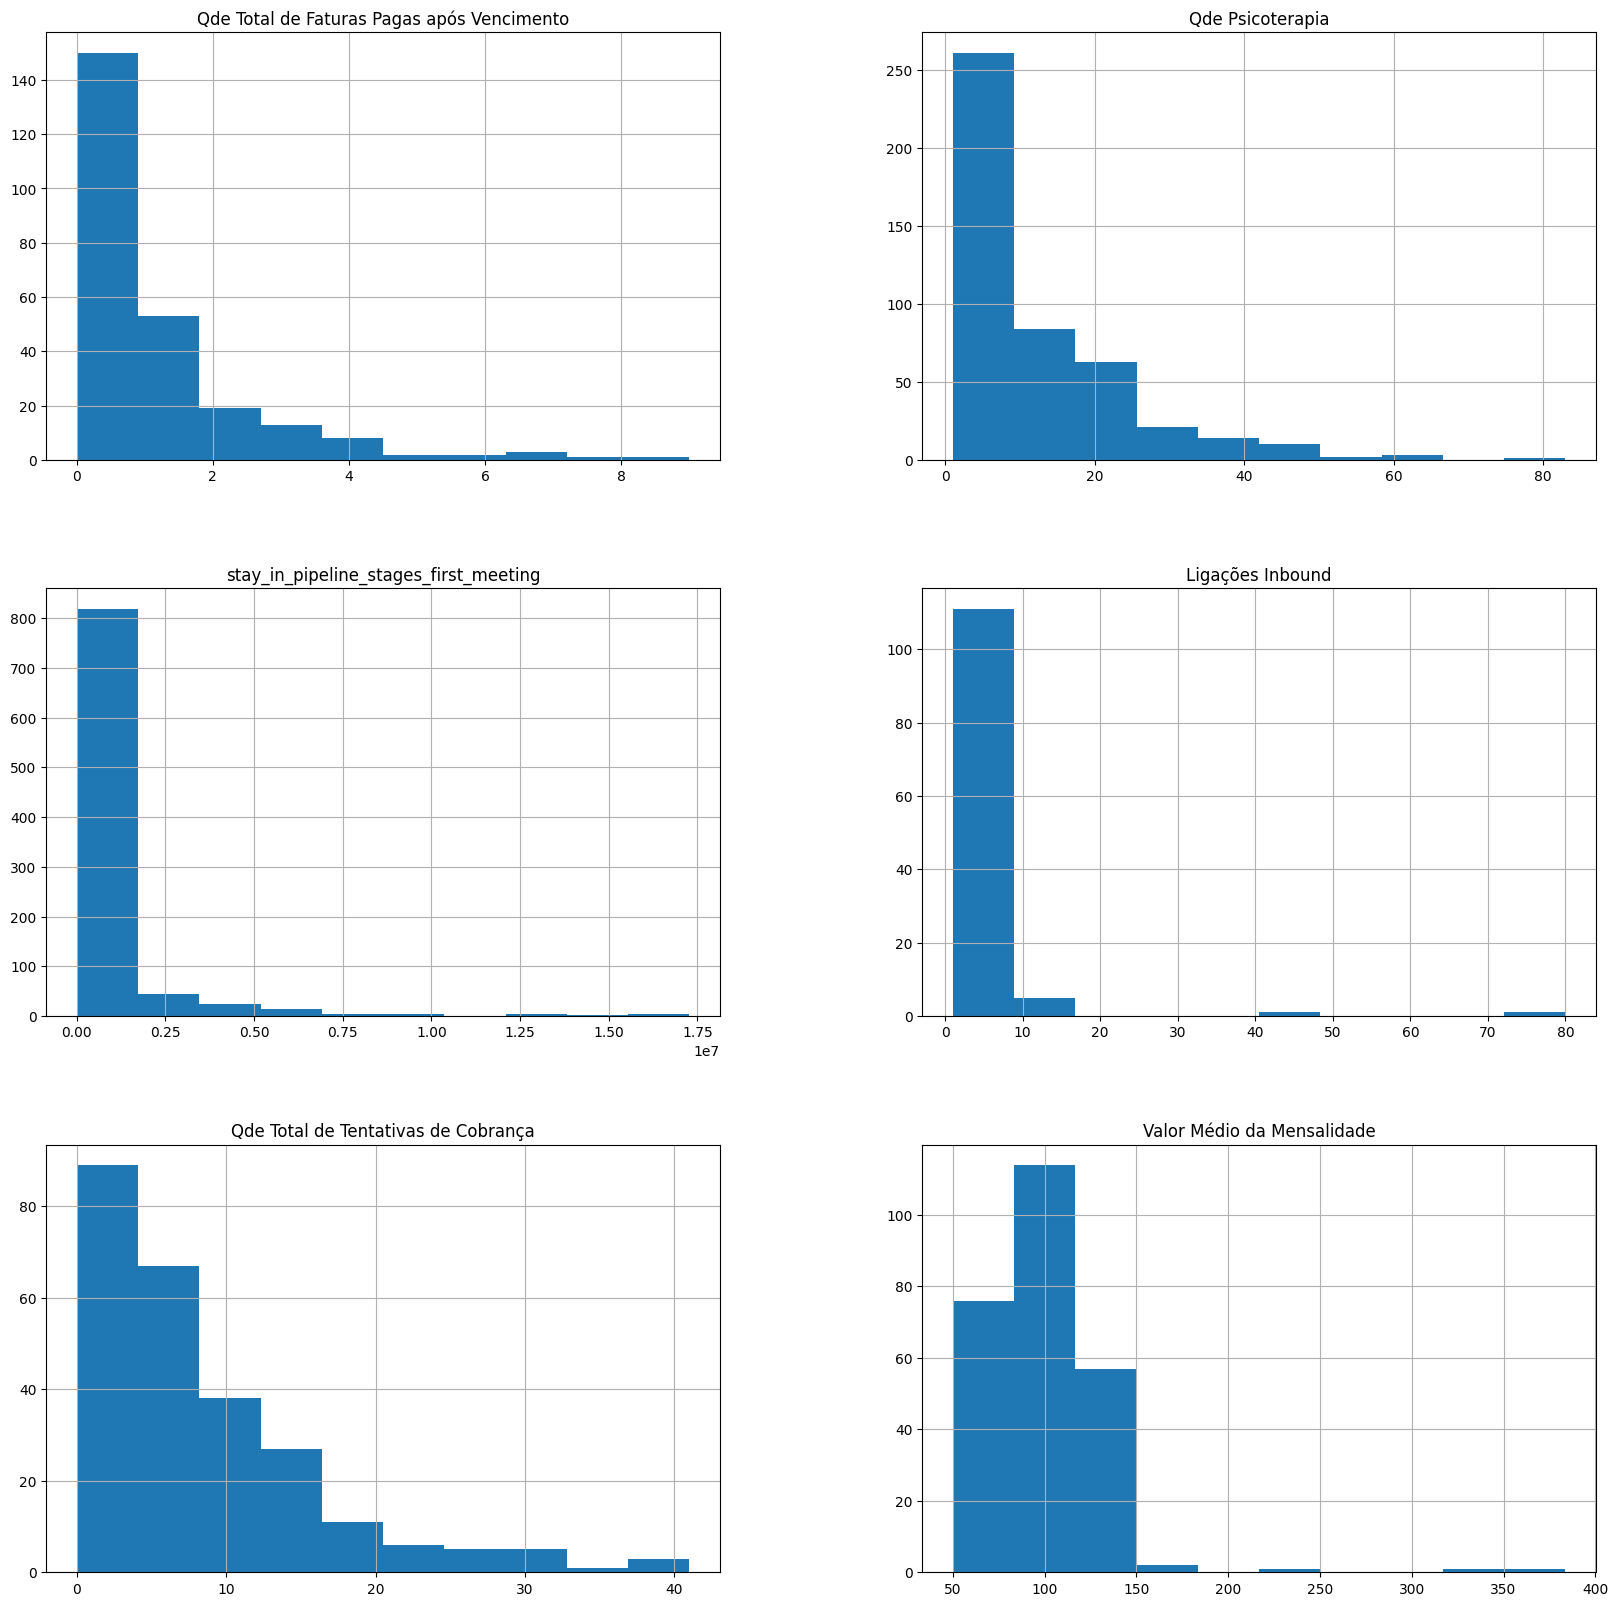

In [75]:
df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]
df_gustavo.hist(figsize=(20,20))
plt.show()

Coluna 'Qde Total de Faturas Pagas após Vencimento' possui muitos valores nulos, deveriamos ou preencher utilizando um mecanismo de imputer ou retirar essa coluna

In [76]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Faturas Pagas após Vencimento'].notna()]
df_notnan['Qde Total de Faturas Pagas após Vencimento'].describe()

count    252.000000
mean       0.880952
std        1.536318
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: Qde Total de Faturas Pagas após Vencimento, dtype: float64

Coluna 'birthdate' deve ser modificada para facilitar a implementação do algoritmo

In [77]:
df_notnan = df_gustavo[df_gustavo['birthdate'].notna()]
df_notnan['birthdate'].describe()

count           1191
unique          1100
top       1995-01-16
freq               8
Name: birthdate, dtype: object

Por não existir 0 na quantidade de psicoterapia talvez os 0 sejam considerados como nan

In [78]:
df_notnan = df_gustavo[df_gustavo['Qde Psicoterapia'].notna()]
df_notnan['Qde Psicoterapia'].describe()

count    459.000000
mean      11.775599
std       12.079602
min        1.000000
25%        3.000000
50%        8.000000
75%       17.000000
max       83.000000
Name: Qde Psicoterapia, dtype: float64

Tempo até responder o questionário de qualidade de vida.
Qual a medida de tempo?

In [79]:
df_notnan = df_gustavo[df_gustavo['stay_in_pipeline_stages_first_meeting'].notna()]
df_notnan['stay_in_pipeline_stages_first_meeting'].describe()

count    9.240000e+02
mean     7.500847e+05
std      2.126858e+06
min      0.000000e+00
25%      3.502500e+02
50%      4.671000e+03
75%      3.804052e+05
max      1.727560e+07
Name: stay_in_pipeline_stages_first_meeting, dtype: float64

Status do processo de onboarding: Aberto, Perdido, Ganho
Dados estão ok pode dropar as linhas que não tem status ou fazer um imputer

In [80]:
df_notnan = df_gustavo[df_gustavo['status.1'].notna()]
df_notnan['status.1'].describe()

count     1116
unique       3
top        won
freq       693
Name: status.1, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [81]:
df_notnan = df_gustavo[df_gustavo['Data Última Ligações Outbound'].notna()]
df_notnan['Data Última Ligações Outbound'].describe()

count                     579
unique                    575
top       2022-12-22 19:46:59
freq                        3
Name: Data Última Ligações Outbound, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [82]:
df_notnan = df_gustavo[df_gustavo['lost_time'].notna()]
df_notnan['lost_time'].describe()

count                     519
unique                    278
top       2022-09-11 03:00:00
freq                       61
Name: lost_time, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [83]:
df_notnan = df_gustavo[df_gustavo['Ligações Inbound'].notna()]
df_notnan['Ligações Inbound'].describe()

count    118.000000
mean       3.144068
std        8.482537
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: Ligações Inbound, dtype: float64

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [84]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Tentativas de Cobrança'].notna()]
df_notnan['Qde Total de Tentativas de Cobrança'].describe()

count    252.000000
mean       8.714286
std        7.736556
min        0.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       41.000000
Name: Qde Total de Tentativas de Cobrança, dtype: float64

Todos são iguais deve dropar

In [85]:
df_notnan = df_gustavo[df_gustavo['Cancelamentos Psicoterapia'].notna()]
df_notnan['Cancelamentos Psicoterapia'].describe()

count      1202
unique        1
top       False
freq       1202
Name: Cancelamentos Psicoterapia, dtype: object

Todos são iguais deve dropar

In [86]:
df_notnan = df_gustavo[df_gustavo['Faltas Todos Atendimento'].notna()]
df_notnan['Faltas Todos Atendimento'].describe()

count      1202
unique        1
top       False
freq       1202
Name: Faltas Todos Atendimento, dtype: object

Poucos valores

In [90]:
df_notnan = df_gustavo[df_gustavo['Valor Médio da Mensalidade'].notna()]
df_notnan['Valor Médio da Mensalidade'].describe()

count    252.000000
mean      94.484683
std       32.399305
min       50.000000
25%       78.000000
50%       88.000000
75%      111.100000
max      383.750000
Name: Valor Médio da Mensalidade, dtype: float64